# Lab 4: Data Conversion Figures of Merit

## Question 1

A 200mV rms value sinusoidal signal is applied to and ideal 12 bits ADC. The full range peak-to-peak voltage of the ADC is 1.2V.

### 1a

Part a: Find the SNR of the ADC output using Python and provide plots.


Peak Voltage: 0.28 V
Theoretical SNR: 74.00 dB


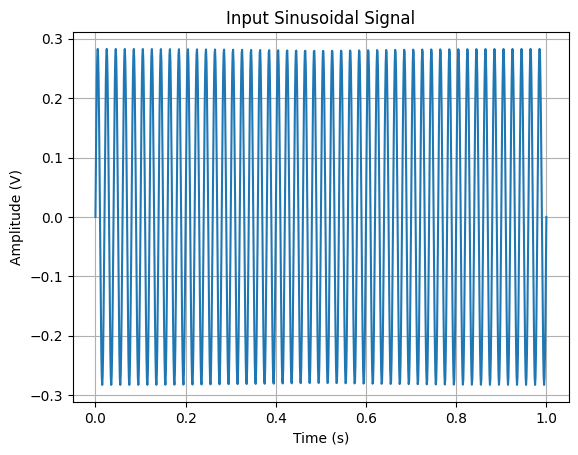

In [20]:
#imports
import numpy as np
import matplotlib.pyplot as plt

#variables
N = 12  #bits
Vpp = 1.2 # in volts
Vrms_signal = 0.2  #Vrms
Vpeak_signal = Vrms_signal * np.sqrt(2)
print(f"Peak Voltage: {Vpeak_signal:.2f} V")

#plotting the snr
SNR_theoretical = 6.02 * N + 1.76  
print(f"Theoretical SNR: {SNR_theoretical:.2f} dB")

t = np.linspace(0, 1, 1000) 

signal = Vpeak_signal * np.sin(2 * np.pi * 50 * t)  
plt.plot(t, signal)

plt.title("Input Sinusoidal Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.grid()
plt.show()

### 1b

Part b: Now the input sinusoidal is full range but comes with an additive Gaussian noise with standard deviation of 0.5 V. What is the SNR of the input signal? What is the SNR of the ADC output bits?


SNR of the input signal: -1.62 dB
SNR of the ADC output: -1.62 dB


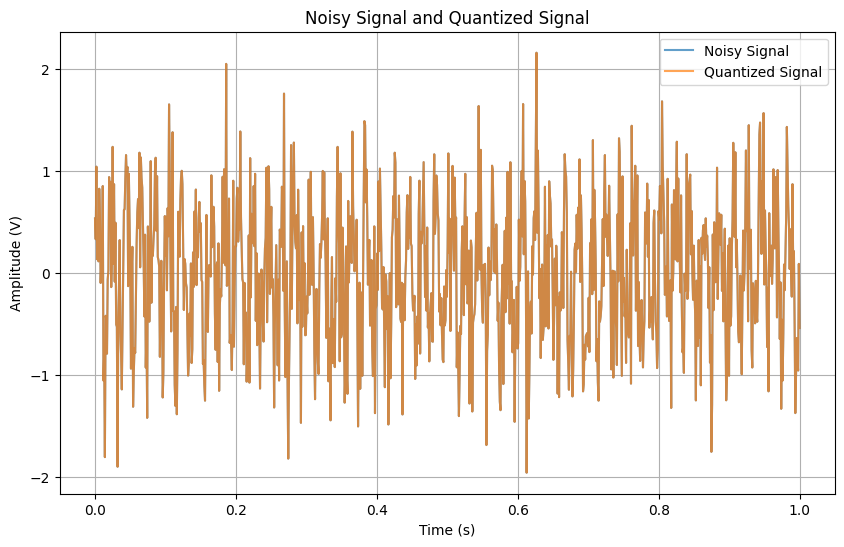

In [21]:
full_range_signal = (Vpp / 2) * np.sin(2 * np.pi * 50 * t)

noise_std = 0.5
noisy_signal = full_range_signal + np.random.normal(0, noise_std, len(t))

# Calculate SNR of the input signal
signal_power = np.mean(full_range_signal**2)
noise_power = np.mean((noisy_signal - full_range_signal)**2)
SNR_input = 10 * np.log10(signal_power / noise_power)
print(f"SNR of the input signal: {SNR_input:.2f} dB")

# Quantize the noisy signal using the ADC resolution
quantization_levels = 2**N
quantized_signal = np.round((noisy_signal + Vpp / 2) * (quantization_levels - 1) / Vpp) * Vpp / (quantization_levels - 1) - Vpp / 2

# Calculate SNR of the ADC output
quantization_noise_power = np.mean((quantized_signal - full_range_signal)**2)
SNR_ADC_output = 10 * np.log10(signal_power / quantization_noise_power)
print(f"SNR of the ADC output: {SNR_ADC_output:.2f} dB")

# Plot the noisy signal and quantized signal
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, label="Noisy Signal", alpha=0.7)
plt.plot(t, quantized_signal, label="Quantized Signal", alpha=0.7)
plt.title("Noisy Signal and Quantized Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.legend()
plt.grid()
plt.show()

### 1c

Part c: Repeat b assuming that the noise added to the sinewave is uniformly distributed with peak-to-peak value of 1V.


SNR of the input signal with uniform noise: 3.34 dB
SNR of the ADC output with uniform noise: 3.34 dB


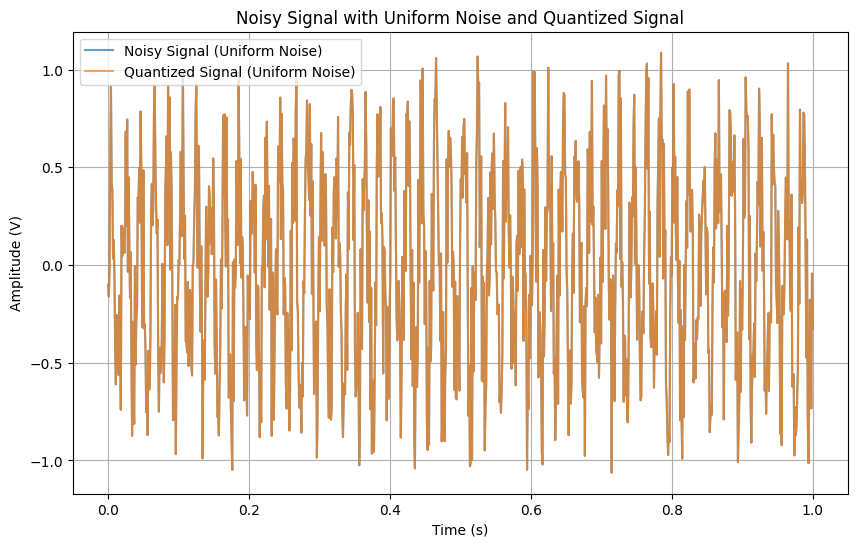

In [22]:
#uniformly distributed noise with peak-to-peak value of 1V
noise_uniform = np.random.uniform(-0.5, 0.5, len(t)) * 1  
noisy_signal_uniform = full_range_signal + noise_uniform

noise_power_uniform = np.mean((noisy_signal_uniform - full_range_signal)**2)
SNR_input_uniform = 10 * np.log10(signal_power / noise_power_uniform)
print(f"SNR of the input signal with uniform noise: {SNR_input_uniform:.2f} dB")

# Quantize the noisy signal with uniform noise using the ADC resolution
quantized_signal_uniform = np.round((noisy_signal_uniform + Vpp / 2) * (quantization_levels - 1) / Vpp) * Vpp / (quantization_levels - 1) - Vpp / 2

# Calculate SNR of the ADC output with uniform noise
quantization_noise_power_uniform = np.mean((quantized_signal_uniform - full_range_signal)**2)
SNR_ADC_output_uniform = 10 * np.log10(signal_power / quantization_noise_power_uniform)
print(f"SNR of the ADC output with uniform noise: {SNR_ADC_output_uniform:.2f} dB")

plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal_uniform, label="Noisy Signal (Uniform Noise)", alpha=0.7)
plt.plot(t, quantized_signal_uniform, label="Quantized Signal (Uniform Noise)", alpha=0.7)
plt.title("Noisy Signal with Uniform Noise and Quantized Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.legend()
plt.grid()
plt.show()

------------------------------------

## Question 2

Assume that an ADC uses an oversampling factor \(K = \frac{f_s}{2B}\), where \(f_s\) is the sampling rate and \(B\) is the signal bandwidth. Then \(K = 1\) is Nyquist rate and \(K > 1\) means oversampling. The quantization noise variance is \(\sigma_e^2 = \frac{\Delta^2}{12}\) as we defined in class for the additive noise model. As you may recall also, this noise is uniformly distributed and white, i.e., is flat in the frequency range \([0, f_s/2]\). Then the noise power spectral density will be \(\frac{\sigma_e^2}{f_s}\), so the integral in the range \([-f_s/2, f_s/2]\) is \(\sigma_e^2\). Now assume that a perfect low-pass filter is used that selects the signal bandwidth \(B\) and rejects all the out of band noise. Find an expression for the output SNR of this oversampled ADC+low-pass filter combination.

In [23]:
B = 1000  
fs = 8000  
K = fs / (2 * B)  

Delta = Vpp / (2**N)

#noise variance from quantization
sigma_e_squared = Delta**2 / 12

noise_psd = sigma_e_squared / fs

noise_power_filtered = noise_psd * B

SNR_output = 10 * np.log10(signal_power / noise_power_filtered)
print(f"Output SNR of the oversampled ADC with low-pass filter: {SNR_output:.2f} dB")

Output SNR of the oversampled ADC with low-pass filter: 83.03 dB


-------------

## Question 3

A 3-bit D/A converter was designed for an ideal LSB level of 100 mV. The following
output voltages levels were measured for the real D/A for thee codes 000 to 111
respectively: -0.01V 0.105V 0.195V 0.28V 0.37V 0.48V 0.6V 0.75V

In [24]:
# Hint: I suggest you take a look at the following article in case of you have questions for this problem: 
# http://focus.ti.com/lit/an/slaa013/slaa013.pdf#search=%22understanding%20data%20converters%20%22

### 3a

Part a: Find the offset \& full-scale error in units of LSBs

### 3b

Part b: Find the end-point ideal \& actual gain in LSB/code and compute the gain error in LSB/code


### 3c

Part c: Find the end point corrected codes and compute DNL & INL for all the codes.


### 3d

Part d: What is the maximum DNL and INL?

---------------------------

## Question 4

A ramp histogram is used to characterize a 4-bit ADC, and the following vector is found: 43 115 85 101 122 170 75 146 125 60 95 95 115 40 120 242

### 4a

Part a: Calculate the DNL and INL


### 4b

Part b: What are the peak DNL and INL values?


### 4c

Part c: Is this ADC monotonic? Hint: Recall that you use as a reference the straight line that connects the end points of the transfer function provided by the histogram. This is needed to eliminate offset errors and full-scale errors. There is a trivial way to eliminate these errors. How?


----------------------

## Question 5

The end point DNL for a 3-bit ADC is measured to be: DNL: 0 -0.5 0 +0.5 -1 +0.5 +0.5
0 (all numbers in terms of LSB) The ADC exhibits offset and full-scale error:

Offset error = +0.5LSB

Full scale error = +0.5LSB



### 5a

Part a: Find the INL for this ADC

### 5b 

Part b: Plot the transfer curve of this ADC in Python.

--------------------

## Question 6

(Going off of an image in the lab manual)

### 6a 

Part a: Please explain the circuit dynamics for $\phi_2$ and $\phi_2$. Clearly indicate the region of operation of the transistors (i.e., OFF, triode, saturation)


### 6b 

Part b: Find an expression of the input vs the output that takes into account the gains and the positive regeneration of the circuit.


### 6c

Part c: Explain the advantages and disadvantages between dynamic and static latches?


### 6d

Part d: Is this latch a static, dynamic or a semi-dynamic latch? Why?

## AD2 Work

### Question 1

reference of 0.5v and full scale of a square wave with 1 v or 

1. build a comparator with an op amp
2. multiple resistors in series to make voltage references for the block diagram for the flash adc
3. generate the transfer function to verufy that it is designed correctly

    choose number of data points to use
    
    from 0 to vfs ub equal size steps 
    
    use the logic analyzer to translate those digital bits to the analog logic analyzer
    
    make this plot in python to find the offset, vfs error, and other analysis points

In [ ]:
# for question 1 see the q1 and q1 ref files in the folder
# note that the frequency was too high for the op amp so I had to reduce to 1 kHz
# using a 100 ohm resistor to the ground and 470 to vdd

# for question 2


